# Индивидульное задание по мудулю "Визуализация данных"

Для выполнения задания был выбран датасет №2 со спском лэптопов с их техничесскими характеристиками

**Цель**: мы хотим выпустить ноутбук, но для этого нужно понимать оптимальные параметры для него. Следовательно, основываясь на пользовательском рейтинге, нам нужно выбрать оптимальную ОС, размер хранилища и т. п.

**Гипотеза**: если мы выпустим ноутбук с наиболее востребованными характеристиками, то он будет лучше продаваться.

### 1. Подключение и настройка датасета для дальнейшего изучения

Подключаем все библиотеки, необходимые для работы:

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Запишем данные из датасета в переменную и выведем его, используя библиотеку pandas:

In [291]:
df = pd.read_csv('laptops.csv')
df

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
979,979,https://rukminim1.flixcart.com/image/312/312/k...,ASUS VivoBook 15 Core i3 10th Gen,37990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,15.6,4.0,1907.0,227.0
980,980,https://rukminim1.flixcart.com/image/312/312/k...,HP Chromebook MediaTek Kompanio 500,22670,MediaTek MediaTek Kompanio 500 Processor,4 GB LPDDR4X RAM,Chrome Operating System,1 TB HDD,11.6,3.8,5991.0,687.0
981,981,https://rukminim1.flixcart.com/image/312/312/x...,ASUS Ryzen 5 Hexa Core,54990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,14.0,4.5,22.0,5.0
982,982,https://rukminim1.flixcart.com/image/312/312/k...,DELL Inspiron Core i3 11th Gen,40990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.0,801.0,104.0


Видно, что датасет содержит 984 строк и 12 столбцов. Проверим данные на дубликаты и удалим их:

In [292]:
df.drop_duplicates(inplace=True)

Выведем описательные характеристики датасета:

In [293]:
df.describe().round(2)

,Unnamed: 0,price(in Rs.),display(in inch),rating,no_of_ratings,no_of_reviews
count,984.00,984.00,984.00,688.00,688.00,688.0
mean,491.50,80960.72,15.15,4.28,718.09,83.9
std,284.20,57421.22,1.33,0.33,1750.82,211.6
min,0.00,15990.00,11.60,1.60,1.00,0.0
25%,245.75,42655.00,14.00,4.10,14.00,2.0
50%,491.50,62990.00,15.60,4.30,90.00,11.0
75%,737.25,94990.00,15.60,4.50,453.00,53.5
max,983.00,419990.00,35.00,5.00,15492.00,2054.0


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        984 non-null    int64  
 1   img_link          984 non-null    object 
 2   name              984 non-null    object 
 3   price(in Rs.)     984 non-null    int64  
 4   processor         984 non-null    object 
 5   ram               984 non-null    object 
 6   os                984 non-null    object 
 7   storage           984 non-null    object 
 8   display(in inch)  984 non-null    float64
 9   rating            688 non-null    float64
 10  no_of_ratings     688 non-null    float64
 11  no_of_reviews     688 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 99.9+ KB


Удалим 1 и 2 столбцы за их ненадобностью в дальнейшем исследовании:

In [295]:
df.drop(df.columns[[0,1]], axis= 1 , inplace= True)

Визуализируем пропущенные значения:

<Axes: >

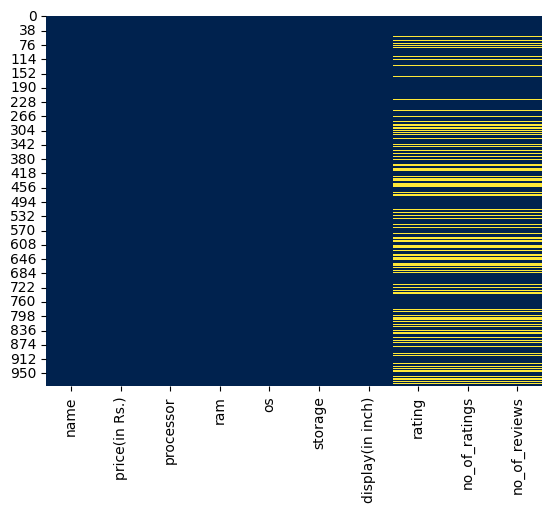

In [296]:
sns.heatmap(df.isnull(), cbar=False, cmap = 'cividis')

Заметим, что все пропущенные значения находятся только в трех последних столбцах, один из которых - это рейтинг. При этом если пропущенное значение присутствует в одной ячейке, то обязательно будет и во всех трех сразу.

**Важно**. Если исходить из цели, то нам необходимо выбрать оптимальные характеристики ноутбука, основываясь на пользовательском рейтинге. Если рейтинга нет, то такие данные для нашей цели бесмыссленны, поэтому мы их можем удалить.

Удалим все строки с пропусками и изменим индексы:

In [297]:
df.dropna(inplace=True)
df = df.set_axis([i for i in range(df.shape[0])])

Приведет последние две колнки к типу данных int, так как в данный момент они представляют собой тип данных float:

In [298]:
df['no_of_ratings'] = df['no_of_ratings'].astype(np.int16)
df['no_of_reviews'] = df['no_of_reviews'].astype(np.int16)

### 2. Исследование полученного датасета
#### 2.1 Общие характеристики продаж ноутбуков

Исходя из гипотезы, нам необходимо выяснить, как та или иная характеристика ноутбука влияет на продажи ноутбука. Для начала построим гистограмму цен:

Text(0, 0.5, 'Количество проданных ноутбуков')

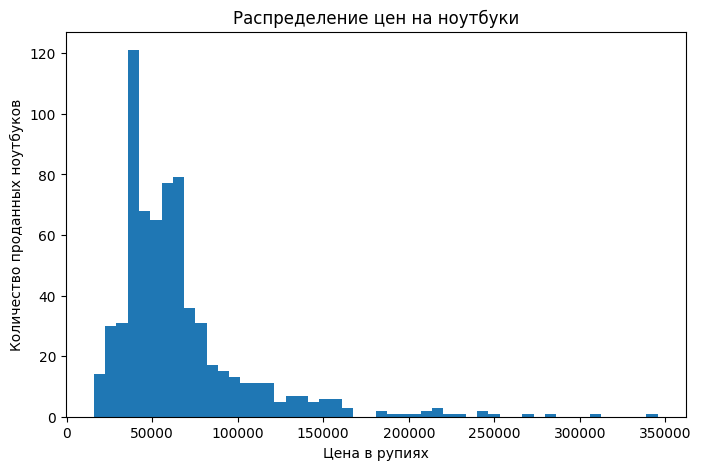

In [299]:
plt.figure(figsize=[8,5])
plt.hist(df['price(in Rs.)'], bins=50)
plt.title('Распределение цен на ноутбуки')
plt.xlabel('Цена в рупиях')
plt.ylabel('Количество проданных ноутбуков')

Видно, что наиболее продаваемые ноутбуки лежат в диапазоне от 30000 до 80000 рупий. При этом распределение имеет значительную ассимметрию. 

При расмотрении вопроса о максимальной прибыли не столько важен вопрос о количестве проданных ноутбуков, сколько об общей прибыли, которые они принесли. Добавим к нашемму датасету колноку, которая будет являться перемножением цены на количество покупок. Количество покупок мы в нулевом приближении можем принять равным количеству оценивших данные ноутбуки, то есть колонке 'no_of_ratings'. После чего построим диаграмму рассеияния

In [300]:
df['Total'] = df['price(in Rs.)'] * df['no_of_ratings']

Text(0, 0.5, 'Общаая стоимость проданных ноутбуков')

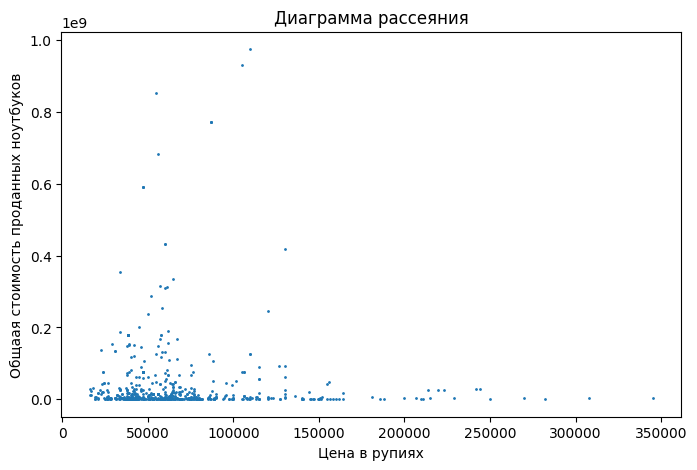

In [301]:
plt.figure(figsize=[8,5])
plt.scatter(df['price(in Rs.)'], df['Total'], s=1)
plt.title('Диаграмма рассеяния')
plt.xlabel('Цена в рупиях')
plt.ylabel('Общаая стоимость проданных ноутбуков')

Видно, что хоть и большиство моделей находятся в пределах от 300000 до 80000 рупий, это не гарантирует им самые высокие продажи. Выясним модель, которая принесла больше всего прибыли:

In [302]:
df.iloc[np.argmax(df['Total'])]

name                   APPLE MacBook Air M1
price(in Rs.)                        109990
processor                Apple M1 Processor
ram                           8 GB DDR4 RAM
os                  Mac OS Operating System
storage                          512 GB SSD
display(in inch)                       13.3
rating                                  4.7
no_of_ratings                          8865
no_of_reviews                           795
Total                             975061350
Name: 268, dtype: object

Этим наутбуком оказалась модель компании Apple, что и не удивительно.

Добавим в датасет колонку с брендами ноутбуков. Для этого произведем разделение строк в колонке 'name' по пробелам и возьмем первое слово оттуда.

In [303]:
df['Brand'] =  pd.Series([i.split(' ')[0] for i in df['name']])

Сагрегируем данные общей стоимости проданных ноутбуков и количеству проданных копий по брендам:

In [304]:
brand_sum = df.groupby('Brand')['Total'].sum().reset_index()
brand_count = df.groupby('Brand')['no_of_ratings'].sum().reset_index()

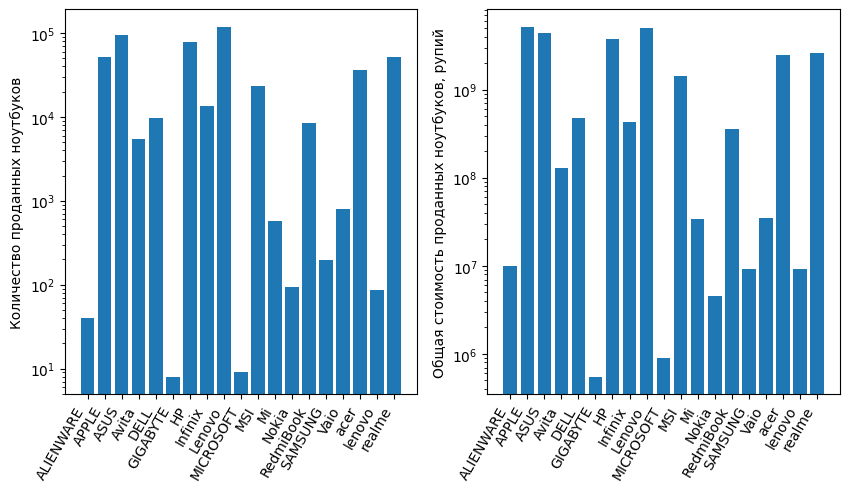

In [328]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize = [10,5])

ax[0].bar(brand_count['Brand'], brand_count['no_of_ratings'])
ax[0].set_yscale('log')
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=60, ha='right')
ax[0].set_ylabel('Количество проданных ноутбуков')

ax[1].bar(brand_sum['Brand'], brand_sum['Total'])
ax[1].set_yscale('log')
ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(), rotation=60, ha='right')
ax[1].set_ylabel('Общая стоимость проданных ноутбуков, рупий')

plt.savefig('im.svg', bbox_inches = 'tight')